# EDA para el mnist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.decomposition import PCA

- Cargo los datos del mnist y los convierto a un dataset de pandas para facilitar la manipulación de los datos.

In [2]:
mnist = fetch_openml('mnist_784')
# Convertir los datos en un DataFrame de Pandas
df = pd.DataFrame(mnist.data)
df['label'] = mnist.target

# Mostrar las primeras filas del DataFrame
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Tenemos la información de cada píxel de la imagen (hay 28x28 = 784 pixeles) como una feature de la entrada que en este caso es la imagen con el dígito.  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to label
dtypes: category(1), int64(784)
memory usage: 418.8 MB


- Limpio el data set en caso de que haya elementos vacios o valores que faltan

In [5]:
df.isna().any().any()

False

False indica que el dataset ya está limpio.

- Histograma de las etiquetas del conjunto de datos MNIST


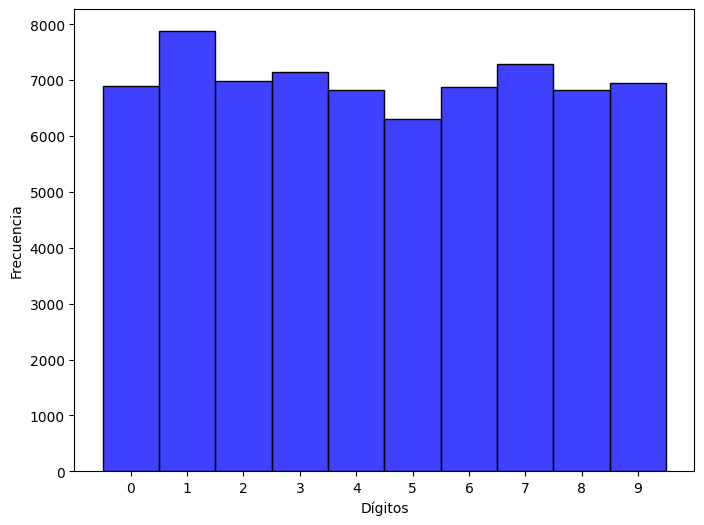

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['label'], bins=range(11), color='blue')
plt.xlabel('Dígitos')
plt.ylabel('Frecuencia')
plt.show()

- Separo el mnist en el conjunto de entrenamiento y en el de validación 


Primeras 10 imágenes del conjunto de entrenamiento:


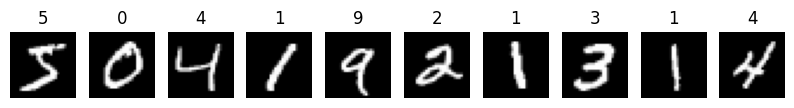


Primeras 10 imágenes del conjunto de prueba:


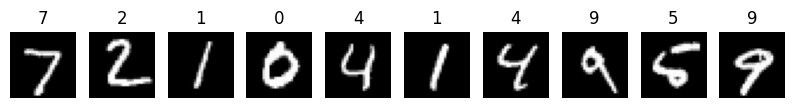

In [7]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Aplanar las imágenes para crear un DataFrame de Pandas
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convertir los datos en DataFrames de Pandas
df_train = pd.DataFrame(X_train_flat)
df_train['label'] = y_train

df_test = pd.DataFrame(X_test_flat)
df_test['label'] = y_test

# Función para visualizar algunas imágenes
def plot_digits(data, labels, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(data.iloc[i].values.reshape(28, 28), cmap='gray')
        plt.title(labels.iloc[i])
        plt.axis('off')
    plt.show()

# Mostrar las primeras 10 imágenes del conjunto de entrenamiento
print("\nPrimeras 10 imágenes del conjunto de entrenamiento:")
plot_digits(df_train.drop('label', axis=1), df_train['label'])

# Mostrar las primeras 10 imágenes del conjunto de prueba
print("\nPrimeras 10 imágenes del conjunto de prueba:")
plot_digits(df_test.drop('label', axis=1), df_test['label'])

- Dimensiones de los conjuntos de entrenamiento y testeo

In [8]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


# Principal component analisis (PCA)

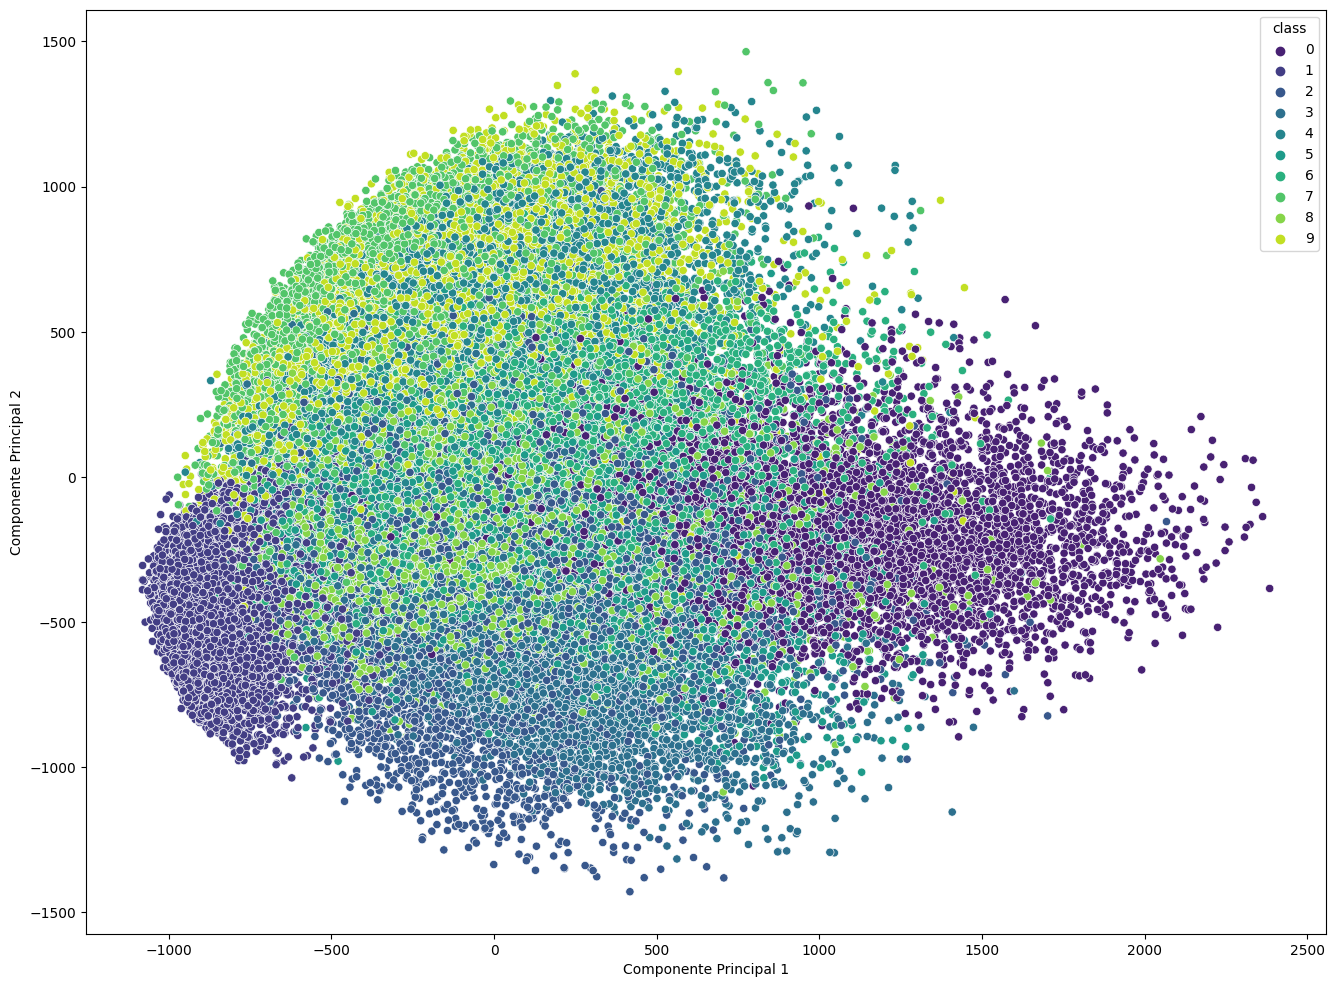

                   PC1           PC2
pixel1   -2.435737e-17  1.480401e-16
pixel2    7.737788e-18 -4.498894e-17
pixel3   -1.035489e-20  1.326733e-18
pixel4    8.475104e-19  5.188945e-18
pixel5    2.387936e-19  1.331595e-18
...                ...           ...
pixel780  6.508756e-08  1.900232e-06
pixel781 -0.000000e+00 -0.000000e+00
pixel782 -0.000000e+00 -0.000000e+00
pixel783 -0.000000e+00 -0.000000e+00
pixel784 -0.000000e+00 -0.000000e+00

[784 rows x 2 columns]


In [9]:
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns

mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

sklearn_pca = sklearnPCA(n_components=2)
X_sklearn_pca = sklearn_pca.fit_transform(X)

plt.figure(figsize=(16, 12))
sns.scatterplot(x=X_sklearn_pca[:, 0], y=X_sklearn_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

loadings_sklearn = pd.DataFrame(sklearn_pca.components_.T, columns=['PC1', 'PC2'], index=mnist.feature_names)
print(loadings_sklearn)

- Gráfico de la varianza acumulada en función del número de componentes

In [10]:
n_components = 500  # Puedes ajustar este número según sea necesario
sklearn_pca = sklearnPCA(n_components=n_components)
X_sklearn_pca = sklearn_pca.fit_transform(X)

# Varianza explicada por las componentes principales
explained_variance_ratio = sklearn_pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

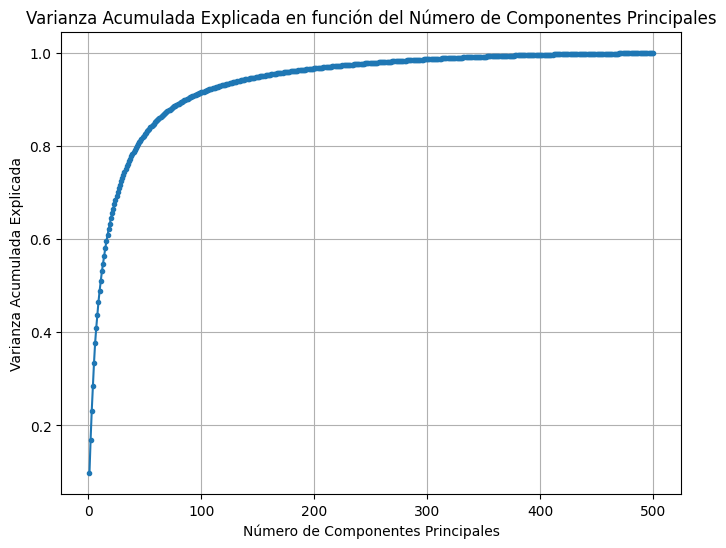

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', markersize=3)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada en función del Número de Componentes Principales')
plt.grid()
plt.show()